# Detecteur de SPAM

In [52]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
df = pd.read_csv("src/spam.csv", encoding="Windows-1252")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [47]:
df.describe(include="all")

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [48]:
def join_text(texts):
    result = ""
    for text in texts:
        if(str(text) != "Nan"):
            result = ", ".join([result, str(text)])
    
    return result[2:]

cols = ['v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']
df['text'] = df[cols].apply(lambda row: join_text(row), axis=1)
df = df.drop(cols, axis=1).rename(columns={"v1": "category"})
df.head()

,category,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,"Ok lar... Joking wif u oni..., nan, nan, nan"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


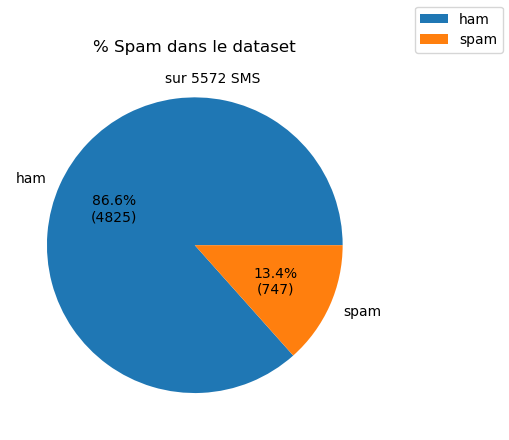

In [67]:
def format_value(x):
    return '{:.1f}%\n({:.0f})'.format(x, len(df)*x/100)

plt.pie(df.category.value_counts(), labels=df.category.value_counts().index, autopct=format_value)
plt.figlegend(df.category.value_counts().index)
plt.title("% Spam dans le dataset")
plt.text(-0.2, 1.1, f"sur {len(df)} SMS")
plt.show()